# <p style="text-align: center;"><u>Historical Stock Market Data Analysis</u></p>
![stock](https://www.fidelity.com/bin-public/600_Fidelity_Com_English/images/migration/AI_moving_averages_2021_banner.jpg)

## Introduction
*In the evolving world of finance, data analysis plays a crucial role in understanding and predicting market trends, making decisions, and getting insights into the performance of prominent companies.
This project aims to delve into the historical stock market data of tech giants using python.*<br>
**What is Data Analysis?** *Data analysis is like being a detective for numbers - you dig into heaps of data, interrogate them with mathematical tools, and unlock their secrets to reveal fascinating patterns and hidden stories! It's like Sherlock Holmes meets the Matrix, but instead of solving crimes, you crack the code of information, empowering you to make smarter choices and predictions.*

**Objective:** The primary objective of this project is to provide data-driven evaluation of the stock market performance of MAANG.

**Data Source:** [MAANG HISTORICAL STOCK MARKET DATA(2001-2023) 📈](https://www.kaggle.com/datasets/soumendraprasad/stock)

**Tools Used:**
1. Kaggle (Dataset)
2. Python (Programming language)
3. NumPy (Python library for computing multi-dimensional data)
4. Pandas (data manipulation and analysis library)
5. MatPlotlib (data visualization and graphical plotting library)
6. Seaborn (Seaborn is a visualization library that is built on top of Matplotlib)

This project was undertaken as the course project for [Data Analysis with Python](zerotopandas.com) by [Jovian](jovian.ml)


*By- Rashmin Chaudhari <br>Date- 4 July 2023*

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

Get the dataset from Kaggle.<br>
*Source: https://www.kaggle.com/datasets/soumendraprasad/stock*

Installing necessary packages.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [2]:
# pip install' installs the packages 'jovian' and 'opendatasets' in the system.
# opendatasets is a Python library for downloading datasets from online sources like Kaggle

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
dataset_url = 'https://www.kaggle.com/datasets/soumendraprasad/stock' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rashcasm
Your Kaggle Key: ········


100%|██████████| 765k/765k [00:01<00:00, 582kB/s]

The dataset has been downloaded and extracted in the directory `stock`.

In [5]:
data_dir = './stock'

We initiated the variable `data_dir` with the value `stocks` i.e. name of the directory.

In [6]:
import os
os.listdir(data_dir)

['Amazon.csv', 'Apple.csv', 'Google.csv', 'Microsoft.csv', 'Netflix.csv']

`import os` is a statement that allows you to access various operating system-related functionalities and utilities provided by the `os` module.<br>Here, we are using it for File and Directory Operations.<br>
`os.listdir` is a function from the `os` module that is used to obtain a list of all the files and directories present in a specified directory path

We got 5 CSV files containing stock data of Amazon, Apple, Google, Microsoft and Netflix respectively.
Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "historical-stock-market-data-analysis"

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rashmin9c/historical-stock-market-data-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/rashmin9c/historical-stock-market-data-analysis


'https://jovian.com/rashmin9c/historical-stock-market-data-analysis'

### importing required libraries

In [11]:
import numpy as np #Linear equations
import matplotlib.pyplot as plt #plotting visualizations
import seaborn as sns #deeper visualizations
import pandas as pd #dataframe control

## Data Preparation and Cleaning

Data preparation and cleaning are critical steps in any data analysis project. These steps involve handling missing or erroneous data, converting data types, and making the dataset ready for analysis.<br> We will see this step by step.

**1.** We will use the Pandas `read_csv()` function to read the `CSV` file and load the data into a `DataFrame`. The DataFrame is a two-dimensional, tabular data structure that will store our dataset.

In [12]:
microsoft_df = pd.read_csv(data_dir + '/Microsoft.csv')
amazon_df = pd.read_csv(data_dir + '/Amazon.csv')
apple_df = pd.read_csv(data_dir + '/Apple.csv')
netflix_df = pd.read_csv(data_dir + '/Netflix.csv')
google_df = pd.read_csv(data_dir + '/Google.csv')

In [13]:
# We will check the type and information of microsoft_df as an example
microsoft_df.info()

# microsoft.csv amazon.csv apple.csv netflix.csv google.csv
# first has 5839 rows, second has 5839 rows, third has 5839 rows, fourth has 5241 rows, fifth has 4677 rows
# respectively.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5839 entries, 0 to 5838
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5839 non-null   float64
 1   High       5839 non-null   float64
 2   Low        5839 non-null   float64
 3   Close      5839 non-null   float64
 4   Adj Close  5839 non-null   float64
 5   Volume     5839 non-null   int64  
 6   Date       5839 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 319.4+ KB


We have successfully loaded the data in respective dataframes.<br>
**2.** Now as we can see that the Date column is having type as object, we will change it to datetime using the `to_datetime`...

In [14]:
microsoft_df['Date']=pd.to_datetime(microsoft_df['Date'])
amazon_df['Date']=pd.to_datetime(amazon_df['Date'])
apple_df['Date']=pd.to_datetime(apple_df['Date'])
netflix_df['Date']=pd.to_datetime(netflix_df['Date'])
google_df['Date']=pd.to_datetime(google_df['Date'])

**3.** Now we will merge the data of all 5 companies into one single dataframe using an outer join. <br> *The result of an outer join includes all the rows from both tables, and any unmatched rows from one table will contain NaN (Not a Number) or null values for the columns belonging to the other table.*

In [15]:
# Adding suffixes to columns for each DataFrame
# The open, close etc are different for different companies, to avoid any type of conflict in data,
# we will add the suffix _m for microsoft, _am for amazon, _ap for apple, _n for netflix and _g for google
microsoft_df = microsoft_df.add_suffix('_m')
amazon_df = amazon_df.add_suffix('_am')
apple_df = apple_df.add_suffix('_ap')
netflix_df = netflix_df.add_suffix('_n')
google_df = google_df.add_suffix('_g')

# Merging DataFrames on the "Date" column
# with other columns, the suffix of date column is changed too, so we will make sure to use left_on and right_on
# so that the dataframe is properly arranged keeping date_m as reference  
merged_df = pd.merge(microsoft_df, amazon_df, how='outer', left_on='Date_m', right_on='Date_am')
merged_df = pd.merge(merged_df, apple_df, how='outer', left_on='Date_m', right_on='Date_ap')
merged_df = pd.merge(merged_df, netflix_df, how='outer', left_on='Date_m', right_on='Date_n')
merged_df = pd.merge(merged_df, google_df, how='outer', left_on='Date_m', right_on='Date_g')

# Droping duplicate "Date" columns and rearranging the order of columns
merged_df.drop(columns=['Date_am', 'Date_ap', 'Date_n', 'Date_g'], inplace=True)
merged_df = merged_df[['Date_m'] + [col for col in merged_df.columns if col != 'Date_m']]

# Rename the "Date_m" column to "Date"
merged_df.rename(columns={"Date_m": "Date"}, inplace=True)

In [16]:
merged_df

,Date,Open_m,High_m,Low_m,Close_m,Adj Close_m,Volume_m,Open_am,High_am,Low_am,...,Low_n,Close_n,Adj Close_n,Volume_n,Open_g,High_g,Low_g,Close_g,Adj Close_g,Volume_g
0,2000-01-03,58.687500,59.312500,56.000000,58.281250,36.361576,53228400,4.075000,4.478125,3.952344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-04,56.781250,58.562500,56.125000,56.312500,35.133263,54119000,4.268750,4.575000,4.087500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-05,55.562500,58.187500,54.687500,56.906250,35.503712,64059600,3.525000,3.756250,3.400000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-06,56.093750,56.937500,54.187500,55.000000,34.314400,54976600,3.565625,3.634375,3.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-07,54.312500,56.125000,53.656250,55.718750,34.762833,62013600,3.350000,3.525000,3.309375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5834,2023-03-13,247.399994,257.910004,245.729996,253.919998,253.919998,33339700,89.970001,94.019997,88.120003,...,285.329987,293.510010,293.510010,6292400.0,90.565002,93.080002,89.940002,91.660004,91.660004,31508600.0
5835,2023-03-14,256.750000,261.070007,255.860001,260.790009,260.790009,33620300,93.830002,95.070000,92.709999,...,290.309998,294.940002,294.940002,5956700.0,93.070000,94.830002,92.779999,94.250000,94.250000,32303900.0
5836,2023-03-15,259.980011,266.480011,259.209991,265.440002,265.440002,46028000,93.220001,96.669998,93.070000,...,292.279999,303.790009,303.790009,9215300.0,93.540001,97.250000,93.040001,96.550003,96.550003,38367300.0
5837,2023-03-16,265.209991,276.559998,263.279999,276.200012,276.200012,54768800,95.750000,100.989998,95.610001,...,301.709991,310.059998,310.059998,7903700.0,96.570000,101.970001,95.870003,101.070000,101.070000,54499500.0


**Let's see what we did.**
- We added suffixes to the column names of each DataFrame using the `add_suffix()` method. This helps us distinguish the columns from different companies when we merge them later.
- We used the `pd.merge()` function to merge the DataFrames based on the "Date" column. The `how='outer'` parameter specifies that we want to perform an outer join, which means we will retain all the rows from all DataFrames, even if they don't have matching "Date" values.
- We performed a series of `pd.merge()` operations to merge all the DataFrames one by one. The result is stored in the `merged_df` DataFrame.
- After merging all the DataFrames, we dropped the duplicate "Date" columns that were created during the merging process. We only kept the "Date_m" column, which represents the "Date" column from the Microsoft DataFrame. We rearrange the order of the columns so that the "Date_m" column is the first column.
*`inplace=True` is used with the `drop()` method to remove the duplicate "Date" columns. Instead of returning a new DataFrame with the duplicate columns removed, it modifies the `merged_df` DataFrame directly, which means the DataFrame will be updated in place, and the duplicate columns will be removed from `merged_df` without having to reassign the result to a new variable.*

**Note:** The code above will run only once, it will not run later again as we change the names of columns and keep `inplace = True`. To run this code again use the feature `Restart and run all` in the `Kernel` tab.

**4.** We can clearly see that not all the 5 companies' data are available for the same period of time and have `NaN` (not a number) value. Let's handle this...

To handle the `NaN` values, we need to keep only the rows of time period when the data for all the 5 companies are available.

In [17]:
# Drop rows with any NaN values in any column
merged_df.dropna(inplace=True)

# Reset the index
merged_df.reset_index(drop=True, inplace=True)

# Get new dataframe
merged_df

,Date,Open_m,High_m,Low_m,Close_m,Adj Close_m,Volume_m,Open_am,High_am,Low_am,...,Low_n,Close_n,Adj Close_n,Volume_n,Open_g,High_g,Low_g,Close_g,Adj Close_g,Volume_g
0,2004-08-19,27.350000,27.450001,27.010000,27.120001,17.069757,46293000,2.013000,2.024000,1.817500,...,2.200000,2.264286,2.264286,5969600.0,2.490664,2.591785,2.390042,2.499133,2.499133,897427216.0
1,2004-08-20,27.129999,27.370001,27.040001,27.200001,17.120106,46494800,1.923000,1.995500,1.905500,...,2.221429,2.262857,2.262857,7652400.0,2.515820,2.716817,2.503118,2.697639,2.697639,458857488.0
2,2004-08-23,27.270000,27.330000,27.120001,27.240000,17.195858,39572200,1.994500,2.000000,1.955500,...,2.235714,2.272857,2.272857,5951400.0,2.758411,2.826406,2.716070,2.724787,2.724787,366857939.0
3,2004-08-24,27.400000,27.459999,27.090000,27.240000,17.195858,40835300,1.986000,1.996500,1.916000,...,2.178571,2.208571,2.208571,7220500.0,2.770615,2.779581,2.579581,2.611960,2.611960,306396159.0
4,2004-08-25,27.209999,27.670000,27.180000,27.549999,17.391554,53512700,1.953000,2.024500,1.908000,...,2.180000,2.238571,2.238571,7523600.0,2.614201,2.689918,2.587302,2.640104,2.640104,184645512.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4672,2023-03-13,247.399994,257.910004,245.729996,253.919998,253.919998,33339700,89.970001,94.019997,88.120003,...,285.329987,293.510010,293.510010,6292400.0,90.565002,93.080002,89.940002,91.660004,91.660004,31508600.0
4673,2023-03-14,256.750000,261.070007,255.860001,260.790009,260.790009,33620300,93.830002,95.070000,92.709999,...,290.309998,294.940002,294.940002,5956700.0,93.070000,94.830002,92.779999,94.250000,94.250000,32303900.0
4674,2023-03-15,259.980011,266.480011,259.209991,265.440002,265.440002,46028000,93.220001,96.669998,93.070000,...,292.279999,303.790009,303.790009,9215300.0,93.540001,97.250000,93.040001,96.550003,96.550003,38367300.0
4675,2023-03-16,265.209991,276.559998,263.279999,276.200012,276.200012,54768800,95.750000,100.989998,95.610001,...,301.709991,310.059998,310.059998,7903700.0,96.570000,101.970001,95.870003,101.070000,101.070000,54499500.0


**Let's see what we did.**
- We use the `dropna()` method with `inplace=True` to remove any rows that contain at least one `NaN` value in any column. After this step, the DataFrame will only contain rows where data is available for all five companies on the same dates.
- We reset the index to ensure a continuous integer index for the DataFrame.

**5.** I want to have Date column as the index column, let's do it in the next step.

In [18]:
merged_df.set_index('Date', inplace=True)
# we are using the 'set_index' method to set the index as Date in the dataset
merged_df

,Open_m,High_m,Low_m,Close_m,Adj Close_m,Volume_m,Open_am,High_am,Low_am,Close_am,...,Low_n,Close_n,Adj Close_n,Volume_n,Open_g,High_g,Low_g,Close_g,Adj Close_g,Volume_g
Date,,,,,,,,,,,,,,,,,,,,,
2004-08-19,27.350000,27.450001,27.010000,27.120001,17.069757,46293000,2.013000,2.024000,1.817500,1.931500,...,2.200000,2.264286,2.264286,5969600.0,2.490664,2.591785,2.390042,2.499133,2.499133,897427216.0
2004-08-20,27.129999,27.370001,27.040001,27.200001,17.120106,46494800,1.923000,1.995500,1.905500,1.975500,...,2.221429,2.262857,2.262857,7652400.0,2.515820,2.716817,2.503118,2.697639,2.697639,458857488.0
2004-08-23,27.270000,27.330000,27.120001,27.240000,17.195858,39572200,1.994500,2.000000,1.955500,1.972500,...,2.235714,2.272857,2.272857,5951400.0,2.758411,2.826406,2.716070,2.724787,2.724787,366857939.0
2004-08-24,27.400000,27.459999,27.090000,27.240000,17.195858,40835300,1.986000,1.996500,1.916000,1.952500,...,2.178571,2.208571,2.208571,7220500.0,2.770615,2.779581,2.579581,2.611960,2.611960,306396159.0
2004-08-25,27.209999,27.670000,27.180000,27.549999,17.391554,53512700,1.953000,2.024500,1.908000,2.015000,...,2.180000,2.238571,2.238571,7523600.0,2.614201,2.689918,2.587302,2.640104,2.640104,184645512.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-13,247.399994,257.910004,245.729996,253.919998,253.919998,33339700,89.970001,94.019997,88.120003,92.430000,...,285.329987,293.510010,293.510010,6292400.0,90.565002,93.080002,89.940002,91.660004,91.660004,31508600.0
2023-03-14,256.750000,261.070007,255.860001,260.790009,260.790009,33620300,93.830002,95.070000,92.709999,94.879997,...,290.309998,294.940002,294.940002,5956700.0,93.070000,94.830002,92.779999,94.250000,94.250000,32303900.0
2023-03-15,259.980011,266.480011,259.209991,265.440002,265.440002,46028000,93.220001,96.669998,93.070000,96.199997,...,292.279999,303.790009,303.790009,9215300.0,93.540001,97.250000,93.040001,96.550003,96.550003,38367300.0


In [19]:
# NOW, WE WILL SAVE OUR PROGRESS
import jovian

In [20]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rashmin9c/historical-stock-market-data-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/rashmin9c/historical-stock-market-data-analysis


'https://jovian.com/rashmin9c/historical-stock-market-data-analysis'

## Exploratory Analysis and Visualization

We perform various tasks to gain insights into the data and visualize key patterns or trends.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [21]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid') # sets the type of style for plot
matplotlib.rcParams['font.size'] = 14 # sets font size
matplotlib.rcParams['figure.figsize'] = (9, 5) # sets figure size
matplotlib.rcParams['figure.facecolor'] = '#00000000' #sets face color

`%matplotlib inline`: This is a special command used in Jupyter notebooks to display Matplotlib-generated plots directly in the notebook. It enables the inline backend for Matplotlib.
Overall, this code snippet sets up the plotting environment with a specific style, font size, figure size, and background color. These settings ensure consistent and visually appealing plots when using Seaborn and Matplotlib.

**Note:** *Every graph in this section will have explanation after the plot.*

### Data summary

In [22]:
merged_df.describe()

,Open_m,High_m,Low_m,Close_m,Adj Close_m,Volume_m,Open_am,High_am,Low_am,Close_am,...,Low_n,Close_n,Adj Close_n,Volume_n,Open_g,High_g,Low_g,Close_g,Adj Close_g,Volume_g
count,4677.000000,4677.000000,4677.000000,4677.000000,4677.000000,4.677000e+03,4677.000000,4677.000000,4677.000000,4677.000000,...,4677.000000,4677.000000,4677.000000,4.677000e+03,4677.000000,4677.000000,4677.000000,4677.000000,4677.000000,4.677000e+03
mean,80.474013,81.287218,79.642324,80.499831,74.859850,4.677612e+07,43.147021,43.653958,42.589047,43.131258,...,134.279068,136.527177,136.527177,1.633033e+07,38.255309,38.656113,37.861995,38.265822,38.265822,1.226090e+08
std,82.975377,83.871933,82.028998,82.998197,84.125115,2.873389e+07,52.190533,52.810681,51.497546,52.149307,...,169.943370,172.578511,172.578511,1.898735e+07,35.540477,35.943265,35.161971,35.555944,35.555944,1.529406e+08
min,15.200000,15.620000,14.870000,15.150000,11.376368,7.425600e+06,1.304500,1.315000,1.288000,1.303500,...,1.272857,1.290000,1.290000,1.144000e+06,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,27.309999,27.520000,27.129999,27.320000,20.496241,2.692250e+07,4.221000,4.282500,4.152500,4.223500,...,5.521429,5.655714,5.655714,6.250800e+06,12.657307,12.771629,12.487195,12.640869,12.640869,2.968400e+07
50%,36.720001,36.889999,36.230000,36.639999,30.913172,4.010560e+07,15.313500,15.490500,15.144000,15.320000,...,46.450001,47.247143,47.247143,1.038450e+07,25.577278,25.772150,25.253166,25.534290,25.534290,6.698614e+07
75%,102.089996,102.970001,101.250000,102.059998,97.196487,5.883070e+07,81.192001,82.090500,80.150002,81.378998,...,241.509995,249.300003,249.300003,1.939910e+07,54.528500,55.233501,53.894001,54.546501,54.546501,1.527946e+08
max,344.619995,349.670013,342.200012,343.109985,339.075562,5.910522e+08,187.199997,188.654007,184.839493,186.570496,...,686.090027,691.690002,691.690002,3.234140e+08,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09


We use the `describe()` method to generate descriptive statistics for the numerical columns in the DataFrame. This includes statistics such as mean, median, standard deviation, minimum, maximum, etc.

### Time Series Analysis

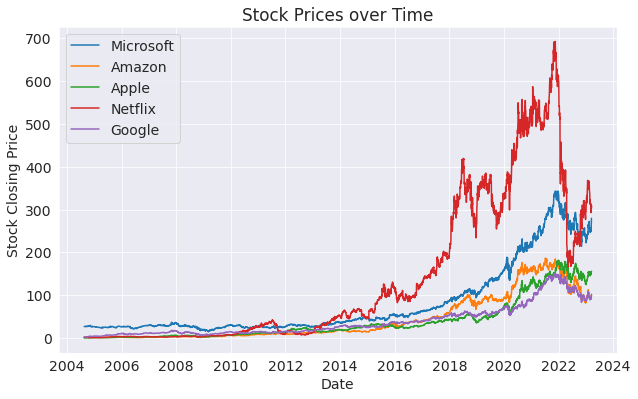

In [23]:
# Plotting the stock closing prices with respect to time...
plt.figure(figsize=(10, 6))
plt.plot(merged_df.index, merged_df.Close_m, label='Microsoft')
plt.plot(merged_df.index, merged_df.Close_am, label='Amazon')
plt.plot(merged_df.index, merged_df.Close_ap, label='Apple')
plt.plot(merged_df.index, merged_df.Close_n, label='Netflix')
plt.plot(merged_df.index, merged_df.Close_g, label='Google')
plt.xlabel('Date') # labels x axis
plt.ylabel('Stock Closing Price') # labels y axis
plt.title('Stock Prices over Time') # sets title of graph
plt.legend()
plt.show()

- We import the `matplotlib.pyplot` module to create visualizations.
- We create a figure and plot the stock prices over time for each company using the `plot()` function. The x-axis represents the index of the DataFrame (date) and the y-axis represents the closing stock price.
- We customize the plot by adding labels to the x-axis and y-axis, setting the title, and adding a legend to distinguish the companies.
- We display the plot using `plt.show()`.

> The line plots of stock prices over time show the overall trend of each company's stock price. We can see the trend and fluctuation in the prices. Between year 2015 to 2022 we see that stocks of Netflix we higher than others but suddenly fell between 2022-2023. On the other hand, Microsoft seems to have continuous and stable growth, still higher than other three. 

### Volume Analysis

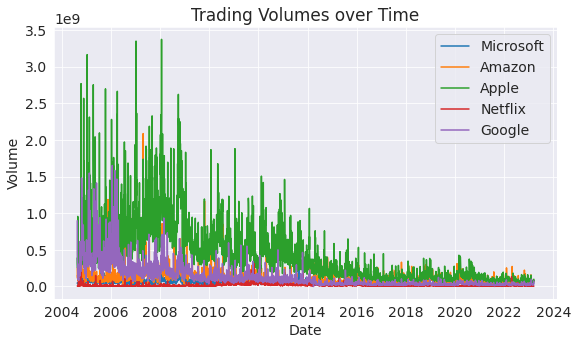

In [24]:
import matplotlib.dates as mdates
#setting size of plot
#plt.figure(figsize=(10, 6))
#setup for the plot
plt.plot(merged_df.index, merged_df.Volume_m, label='Microsoft')
plt.plot(merged_df.index, merged_df.Volume_am, label='Amazon')
plt.plot(merged_df.index, merged_df.Volume_ap, label='Apple')
plt.plot(merged_df.index, merged_df.Volume_n, label='Netflix')
plt.plot(merged_df.index, merged_df.Volume_g, label='Google')
#labeling
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Trading Volumes over Time')
# Getting the output
plt.legend()
plt.show()

We plot the trading volumes over time for each company using the `plot()` function from `matplotlib.pyplot`.
Similar to the previous example, we specify the x-axis (index of the DataFrame, representing dates) and the y-axis (volume) for each company.
We add labels to the x-axis and y-axis, set the title, and include a legend to differentiate the companies.

> The line plots depicting trading volumes over time provide insights into the trading activity of each company. Higher trading volumes often indicate heightened investor interest or increased market activity. By comparing volume trends across companies, we can discern disparities in market liquidity and investor sentiment.
Notably, from 2004 to 2023, Apple stands out with significantly higher trading volumes, indicating its active involvement in attracting increased investor interest and driving market activity. 

### Financial Indicators

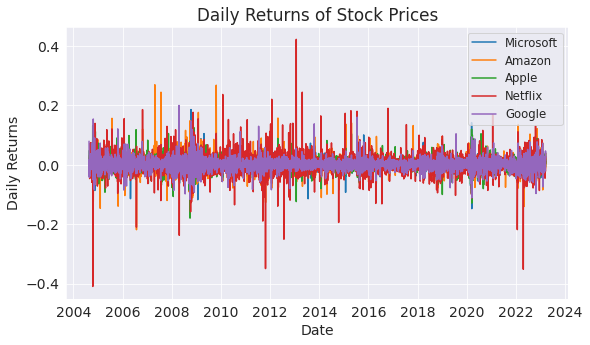

In [25]:
# Calculate daily returns for each company
daily_returns = merged_df[['Close_m', 'Close_am', 'Close_ap', 'Close_n', 'Close_g']].pct_change()
# pct_change() computes the percentage change from the previous element to the current element.
# It is particularly useful for analyzing time series data or any data where the
# relative change between consecutive values is of interest.

# Plot the daily returns
plt.plot(daily_returns.index, daily_returns.Close_m, label='Microsoft')
plt.plot(daily_returns.index, daily_returns.Close_am, label='Amazon')
plt.plot(daily_returns.index, daily_returns.Close_ap, label='Apple')
plt.plot(daily_returns.index, daily_returns.Close_n, label='Netflix')
plt.plot(daily_returns.index, daily_returns.Close_g, label='Google')
# labeling
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('Daily Returns of Stock Prices')
# Shifting the legend to the right corner
plt.legend(loc='upper right', fontsize='small')
# getting output
plt.show()

- We calculate the daily returns for each company's stock prices using the pct_change() function on a subset of the DataFrame containing the closing prices.
- We plot the daily returns for each company over time using the plot() function.
- The x-axis represents the index (dates), and the y-axis represents the daily returns.

**Note:** By default, `pct_change()` calculates the percentage change using the formula: `(current_value - previous_value) / previous_value`.

> The line plots of daily returns show the percentage change in stock prices on a daily basis. Positive returns indicate growth or profitability, while negative returns may suggest a decline. Analyzing the daily returns helps assess the volatility and performance of the stocks.
We see that Netflix has a lot of fluctuations between positive and negative. On the other hand, Google can be seen stable either ways.

### Mean closing prices

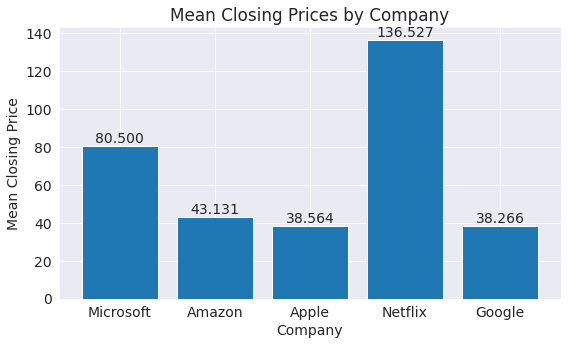

In [26]:
# Calculate the mean closing prices for each company
mean_prices = merged_df[['Close_m', 'Close_am', 'Close_ap', 'Close_n', 'Close_g']].mean()

# Define the company labels
company_labels = ['Microsoft', 'Amazon', 'Apple', 'Netflix', 'Google']

# Create a bar chart to compare the mean closing prices
plt.bar(company_labels, mean_prices.values)
plt.xlabel('Company')
plt.ylabel('Mean Closing Price')
plt.title('Mean Closing Prices by Company')

# Adding value labels above each bar
for i, mean_price in enumerate(mean_prices):
    plt.text(i, mean_price, f'{mean_price:.3f}', ha='center', va='bottom')

plt.show()

We calculate the mean closing prices for each company using the `mean()` function on a subset of the DataFrame.
We create a bar chart using the `bar()` function, where each bar represents the mean closing price for a specific company.

> The bar chart allows for a direct comparison of the mean closing prices for each company. You can identify which company has the highest or lowest mean closing price and observe any significant differences among the companies.
Netflix has highest mean closing price and Google has lowest.

### Microsoft's stock price against its trading volume

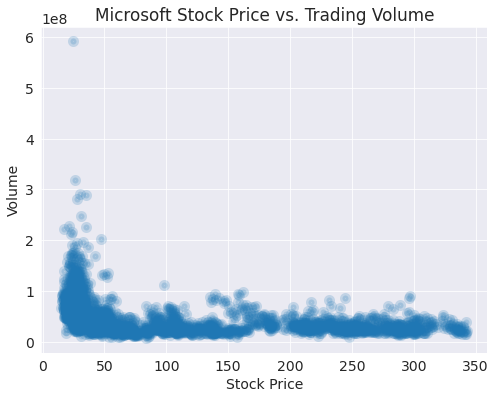

In [27]:
# Create a scatter plot of Microsoft's stock price against its trading volume
plt.figure(figsize=(8, 6))
plt.scatter(merged_df.Close_m, merged_df.Volume_m, alpha=0.2, linewidths=5)  # Adjusting alpha, edgecolors, and linewidths
plt.xlabel('Stock Price')
plt.ylabel('Volume')
plt.title('Microsoft Stock Price vs. Trading Volume')

plt.show()

- We create a scatter plot using the scatter() function to visualize the relationship between Microsoft's stock price and its trading volume.
- We pass the stock price as the x-axis values and the trading volume as the y-axis values.
- The alpha parameter sets the transparency of the markers.

> By observing the distribution of points, you can identify any patterns or correlations between stock price and trading volume.
Higher trading volumes may align with significant changes in stock price, indicating increased market activity.
In the given graph, volume is higher when the stock price is comparatively less.

### Saving work
Let us save and upload our work to Jovian before continuing

In [28]:
import jovian

In [29]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rashmin9c/historical-stock-market-data-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/rashmin9c/historical-stock-market-data-analysis


'https://jovian.com/rashmin9c/historical-stock-market-data-analysis'

## Asking and Answering Questions

**Note:** This section is in format Question, Analysis, Visualization, Explanation.

#### Q1: What are the average trading volumes for each company over time?

To determine the average trading volumes, we can calculate the mean trading volumes for each company and visualize them using line graphs.

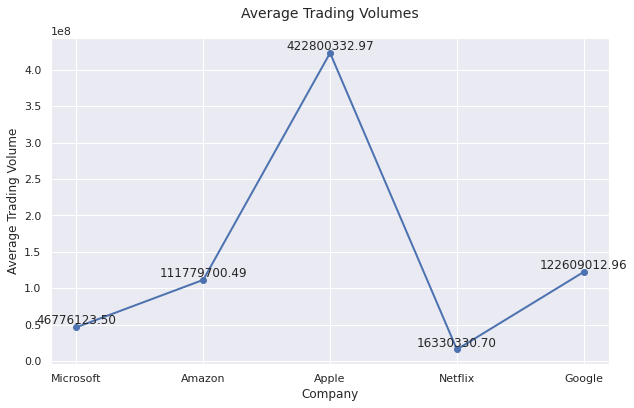

In [30]:
# Set Seaborn style and adjust plot margins for padding
sns.set(rc={'figure.figsize': (10, 6), 'axes.titlesize': 14, 'axes.labelsize': 12, 'axes.titlepad': 20})

# Calculate the average trading volumes for each company
average_volumes = merged_df[['Volume_m', 'Volume_am', 'Volume_ap', 'Volume_n', 'Volume_g']].mean()
Comp_vol = ['Microsoft', 'Amazon', 'Apple', 'Netflix', 'Google']

# Plot the average trading volumes for each company
plt.plot(Comp_vol, average_volumes.values, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Company')
plt.ylabel('Average Trading Volume')
plt.title('Average Trading Volumes')

# Adding data labels to the plot
for x, y in zip(Comp_vol, average_volumes.values):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()

- We calculate the average trading volumes for each company using the mean() function from Pandas.
- The line graph displays the average trading volumes for each company, with each company represented on the x-axis and the average volume on the y-axis.

#### Q2: Is there any correlation between the closing prices of the technology giants (Microsoft, Amazon, Apple, Netflix, Google) over time?

By calculating the correlation coefficient between the closing prices of different companies, we can determine if there is a relationship in their price movements.

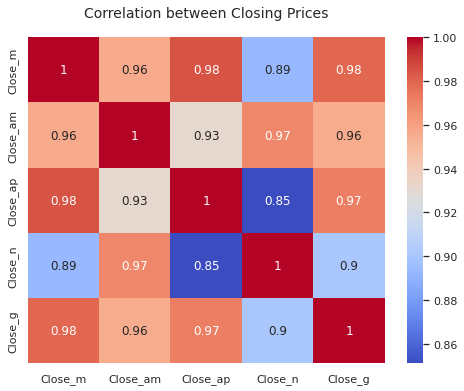

In [31]:
# Calculate the correlation matrix
corr_matrix = merged_df[['Close_m', 'Close_am', 'Close_ap', 'Close_n', 'Close_g']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Closing Prices')
plt.show()

- We can see the index and check the correlation between closing prices of the companies
- The code calculates the correlation matrix using the `corr()` function from Pandas. It selects the columns corresponding to the closing prices of different companies.
- The `seaborn.heatmap()` function is used to create a heatmap of the correlation matrix. This visualization helps to identify the strength and direction of the correlation between the closing prices of different companies.

#### Q3: Which month tends to have the highest average closing price for each company?

By grouping the data by month and calculating the average closing price, we can identify the month that typically exhibits the highest average closing price for each company.

In [32]:
# Extract the month from the index (Date)
merged_df['Month'] = merged_df.index.month

# Calculate the average closing price by month for each company
monthly_avg_closing = merged_df.groupby(['Month']).mean()[['Close_m', 'Close_am', 'Close_ap', 'Close_n', 'Close_g']]

# Identify the month with the highest average closing price for each company
highest_avg_month = monthly_avg_closing.idxmax()

# Display the results
highest_avg_month

Close_m     2
Close_am    7
Close_ap    2
Close_n     2
Close_g     2
dtype: int64

Using the data, we know the months in the course of 20 years which has highest average closing price for each company.

- `merged_df['Month'] = merged_df.index.month`: This line extracts the month from the index (Date) and assigns it to a new column called 'Month'.
- `highest_avg_month = monthly_avg_closing.idxmax()`: This line uses the `idxmax()` function to identify the index (i.e., the month) with the highest average closing price for each company. It returns a Series object containing the highest average month for each company.
- The results are displayed by printing the `highest_avg_month` Series, which shows the month with the highest average closing price for each company throughout the entire dataset.

#### Q4: How many days did each company's stock price increase or decrease?

Count the number of days where the closing price increased or decreased compared to the previous day for each company.

In [33]:
merged_df['PriceChange_m'] = merged_df['Close_m'].diff().apply(lambda x: 'Increase' if x > 0 else 'Decrease')
merged_df['PriceChange_am'] = merged_df['Close_am'].diff().apply(lambda x: 'Increase' if x > 0 else 'Decrease')
merged_df['PriceChange_ap'] = merged_df['Close_ap'].diff().apply(lambda x: 'Increase' if x > 0 else 'Decrease')
merged_df['PriceChange_n'] = merged_df['Close_n'].diff().apply(lambda x: 'Increase' if x > 0 else 'Decrease')
merged_df['PriceChange_g'] = merged_df['Close_g'].diff().apply(lambda x: 'Increase' if x > 0 else 'Decrease')

price_change_counts = merged_df[['PriceChange_m', 'PriceChange_am', 'PriceChange_ap', 'PriceChange_n', 'PriceChange_g']].apply(pd.Series.value_counts)
price_change_counts

,PriceChange_m,PriceChange_am,PriceChange_ap,PriceChange_n,PriceChange_g
Increase,2382,2409,2478,2367,2448
Decrease,2295,2268,2199,2310,2229


`merged_df['PriceChange_m'] = merged_df['Close_m'].diff().apply(lambda x: 'Increase' if x > 0 else 'Decrease')`:
- `merged_df['Close_m'].diff()` calculates the difference between the closing prices of consecutive days for the Microsoft stock.
- The lambda function is applied to each difference value. If the difference is greater than 0, the value is assigned as 'Increase', otherwise 'Decrease'.
- The result is stored in a new column called 'PriceChange_m', indicating whether the price increased or decreased compared to the previous day for Microsoft.

Similarly with other companies too.

#### Q5: How does the volatility (standard deviation) of the closing prices vary across different companies?

The standard deviation provides a measure of the dispersion or variability of a dataset. A higher standard deviation indicates higher volatility, implying that the closing prices experience larger fluctuations over time.

In [34]:
# Calculate the standard deviation of closing prices for each company
closing_std = pd.DataFrame({
    'Company': ['Microsoft', 'Amazon', 'Apple', 'Netflix', 'Google'],
    'Closing_Std': [np.std(merged_df['Close_m']), np.std(merged_df['Close_am']),
                    np.std(merged_df['Close_ap']), np.std(merged_df['Close_n']),
                    np.std(merged_df['Close_g'])]
})

# Display the results
closing_std

,Company,Closing_Std
0,Microsoft,82.989324
1,Amazon,52.143731
2,Apple,46.518716
3,Netflix,172.560060
4,Google,35.552143


- The code calculates the standard deviation of the closing prices for each company using the `np.std()` function. The closing prices are accessed from the merged DataFrame using the respective column names `('Close_m', 'Close_am', 'Close_ap', 'Close_n', 'Close_g')`.
- The results are stored in a new DataFrame called `closing_std`. It consists of two columns: 'Company' containing the names of the companies and 'Closing_Std' containing the computed standard deviations.

Let us save and upload our work to Jovian before continuing.

In [35]:
import jovian

In [36]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rashmin9c/historical-stock-market-data-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/rashmin9c/historical-stock-market-data-analysis


'https://jovian.com/rashmin9c/historical-stock-market-data-analysis'

## Inferences and Conclusion

**The project can be summarized into the following steps:**

1. Downloading the dataset: The project starts by downloading the dataset from Kaggle using the `opendatasets` library. This step ensures that the required data is obtained for analysis.

2. Data preparation and cleaning: Using the `pandas` library, the dataset is prepared and cleaned. This involves handling missing values, removing duplicates, and organizing the data in a structured format. The five datasets are merged together to create a unified dataset for analysis.

3. Exploratory analysis: The project utilizes various libraries such as `numpy`, `pandas`, `matplotlib`, and `seaborn` to perform exploratory analysis on the dataset. This analysis includes:

   a. Data summary: Calculating summary statistics such as mean, median, standard deviation, and more to gain insights into the dataset.

   b. Time series analysis: Visualizing the time series data, analyzing trends, seasonality, and identifying any patterns or anomalies.

   c. Volume analysis: Examining the trading volumes over time, comparing volumes across different companies, and identifying any notable trends or discrepancies.

   d. Financial indicators: Calculating and analyzing financial indicators such as daily returns of stock price.

   e. Mean closing price: Computing the mean closing prices for each company and visualizing them to compare the average performance.<br>

4. Asking and answering questions: The project involves asking relevant questions about the data and providing answers through analysis. This could include questions about the relationship between variables, identifying influential factors, or predicting future trends based on historical data.

We made conclusions in the `Exploratory Analysis` and `Asking and Answering Questions` section of this project, such as
- Between year 2015 to 2022 we see that stocks of Netflix we higher than others but suddenly fell between 2022-2023. On the other hand, Microsoft seems to have continuous and stable growth, still higher than other three.
- Notably, from 2004 to 2023, Apple stands out with significantly higher trading volumes, indicating its active involvement in attracting increased investor interest and driving market activity.
- Netflix has highest mean closing price and Google has lowest.
- Stock price of microsoft increased for 2382 days and decreased 2295 for days
etc.

In [37]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

## References and Future Work

**References:**
- Dataset: https://www.kaggle.com/datasets/soumendraprasad/stock
- NumPy: https://numpy.org/
- Pandas: https://pandas.pydata.org/
- MatPlotlib: https://matplotlib.org/
- Seaborn: https://seaborn.pydata.org/

**Future work:**
- Predictive modeling: Build predictive models using machine learning techniques to forecast stock prices or predict trading volumes. This could involve exploring regression models, time series analysis, or even advanced techniques like deep learning.
- Sector analysis: Extend the analysis to include sector-level analysis by grouping companies based on their industries. This can reveal sector-specific trends, correlations, and performance indicators.

Let's save the project.

In [ ]:
import jovian

In [ ]:
jovian.commit()